In [2]:
import pandas as pd

def read_and_process_csv(file_path):
    dataf = pd.read_csv(file_path, encoding='iso-8859-1', decimal=',', delimiter=';', skiprows=8)
    dataf.drop(["Unnamed: 19"], axis=1, inplace=True)
    if "Data" in dataf.columns:
        dataf.rename(columns={'Data':'DATA (YYYY-MM-DD)', 'Hora UTC':'HORA (UTC)'}, inplace=True)
    dataf["HORA (UTC)"] = dataf["HORA (UTC)"].apply(lambda x: int(str(x)[0:2]))
    data = dataf["DATA (YYYY-MM-DD)"].values
    index = pd.DatetimeIndex(data, name="DATA")
    dataf.drop("DATA (YYYY-MM-DD)", axis=1, inplace=True)
    dataf.set_index(index, inplace=True)
    return dataf

estado = ["maceio2003.CSV", "maceio2013.CSV", "maceio2023.CSV"]

dfs = []

for file_path in estado:
    df = read_and_process_csv(file_path)
    dfs.append(df)

df = pd.concat(dfs)


df



,HORA (UTC),"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",RADIACAO GLOBAL (Kj/m²)
DATA,,,,,,,,,,,,,,,,,,,
2003-02-25,0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,NaN
2003-02-25,1,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,NaN
2003-02-25,2,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,NaN
2003-02-25,3,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,NaN
2003-02-25,4,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31,19,0.0,1001.8,1001.8,1001.0,NaN,28.9,23.3,30.8,28.7,24.5,23.3,73.0,66.0,72.0,62.0,9.2,4.8,1466.2
2023-12-31,20,0.0,1002.0,1002.0,1001.5,NaN,28.3,23.7,29.7,28.3,24.2,23.3,76.0,71.0,76.0,71.0,8.1,5.2,338.2
2023-12-31,21,0.0,1002.0,1002.1,1001.9,NaN,27.2,24.3,28.3,27.2,24.3,23.5,84.0,76.0,84.0,84.0,8.1,4.0,71.4


In [3]:
col = []
for column in df.columns:
    if "PRESSAO" in column or "PRESSÃO" in column:
        col.append(("Pressão", column))
    elif "TEMPERATURA" in column:
        col.append(("Temperatura", column))
    elif "UMIDADE" in column:
        col.append(("Umidade", column))
    elif "VENTO" in column:
        col.append(("Velocidade do Vento", column))
    else:
        col.append((column, ""))

df.columns = pd.MultiIndex.from_tuples(col)
df

HORA (UTC) PRECIPITAÇÃO TOTAL, HORÁRIO (mm)  \
                                                         
DATA                                                     
2003-02-25          0                          -9999.0   
2003-02-25          1                          -9999.0   
2003-02-25          2                          -9999.0   
2003-02-25          3                          -9999.0   
2003-02-25          4                          -9999.0   
...               ...                              ...   
2023-12-31         19                              0.0   
2023-12-31         20                              0.0   
2023-12-31         21                              0.0   
2023-12-31         22                              0.0   
2023-12-31         23                              0.0   

                                                         Pressão  \
           PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)   
DATA                                                               
2003-02-25                                            -9999.0      
2003-02-25                                            -9999.0      
2003-02-25                                            -9999.0      
2003-02-25                                            -9999.0      
2003-02-25                                            -9999.0      
...                                                       ...      
2023-12-31                                             1001.8      
2023-12-31                                             1002.0      
2023-12-31                                             1002.0      
2023-12-31                                             1002.8      
2023-12-31                                             1002.7      

                                                            \
           PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)   
DATA                                                         
2003-02-25                                         -9999.0   
2003-02-25                                         -9999.0   
2003-02-25                                         -9999.0   
2003-02-25                                         -9999.0   
2003-02-25                                         -9999.0   
...                                                    ...   
2023-12-31                                          1001.8   
2023-12-31                                          1002.0   
2023-12-31                                          1002.1   
2023-12-31                                          1002.8   
2023-12-31                                          1002.9   

                                                             \
           PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)   
DATA                                                          
2003-02-25                                          -9999.0   
2003-02-25                                          -9999.0   
2003-02-25                                          -9999.0   
2003-02-25                                          -9999.0   
2003-02-25                                          -9999.0   
...                                                     ...   
2023-12-31                                           1001.0   
2023-12-31                                           1001.5   
2023-12-31                                           1001.9   
2023-12-31                                           1002.0   
2023-12-31                                           1002.6   

           RADIACAO GLOBAL (KJ/m²)  \
                                     
DATA                                 
2003-02-25                 -9999.0   
2003-02-25                 -9999.0   
2003-02-25                 -9999.0   
2003-02-25                 -9999.0   
2003-02-25                 -9999.0   
...                            ...   
2023-12-31                     NaN   
2023-12-31                     NaN   
2023-12-31                     NaN   
2023-12-31                     NaN   

In [9]:
def mes_para_estacao(mes):
    if mes in range(1, 4):
        return "VERÃO"
    elif mes in range(4, 7):
        return "OUTONO"
    elif mes in range(7, 10):
        return "INVERNO"
    else:
        return "PRIMAVERA"

In [10]:
def hr_intervalo(hr):
    intervalos = {0: "MADRUGADA", 1: "MADRUGADA", 2: "MADRUGADA", 3: "MADRUGADA", 4: "MADRUGADA",
                  5: "MADRUGADA", 6: "MADRUGADA", 7: "MANHÃ", 8: "MANHÃ", 9: "MANHÃ", 10: "MANHÃ",
                  11: "MANHÃ", 12: "MANHÃ", 13: "TARDE", 14: "TARDE", 15: "TARDE", 16: "TARDE",
                  17: "TARDE", 18: "TARDE", 19: "NOITE", 20: "NOITE", 21: "NOITE", 22: "NOITE",
                  23: "NOITE"}
    return intervalos[hr]

df["INTERVALO"] = df["HORA (UTC)"].apply(hr_intervalo)

df.head(24)


HORA (UTC) PRECIPITAÇÃO TOTAL, HORÁRIO (mm)  \
                                                         
DATA                                                     
2003-02-25          0                          -9999.0   
2003-02-25          1                          -9999.0   
2003-02-25          2                          -9999.0   
2003-02-25          3                          -9999.0   
2003-02-25          4                          -9999.0   
2003-02-25          5                          -9999.0   
2003-02-25          6                          -9999.0   
2003-02-25          7                          -9999.0   
2003-02-25          8                          -9999.0   
2003-02-25          9                          -9999.0   
2003-02-25         10                          -9999.0   
2003-02-25         11                          -9999.0   
2003-02-25         12                          -9999.0   
2003-02-25         13                          -9999.0   
2003-02-25         14                              0.0   
2003-02-25         15                              0.0   
2003-02-25         16                              0.0   
2003-02-25         17                              0.0   
2003-02-25         18                              0.0   
2003-02-25         19                              0.0   
2003-02-25         20                              0.0   
2003-02-25         21                              0.0   
2003-02-25         22                              0.0   
2003-02-25         23                              0.0   

                                                         Pressão  \
           PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)   
DATA                                                               
2003-02-25                                            -9999.0      
2003-02-25                                            -9999.0      
2003-02-25                                            -9999.0      
2003-02-25                                            -9999.0      
2003-02-25                                            -9999.0      
2003-02-25                                            -9999.0      
2003-02-25                                            -9999.0      
2003-02-25                                            -9999.0      
2003-02-25                                            -9999.0      
2003-02-25                                            -9999.0      
2003-02-25                                            -9999.0      
2003-02-25                                            -9999.0      
2003-02-25                                            -9999.0      
2003-02-25                                            -9999.0      
2003-02-25                                             1003.4      
2003-02-25                                             1003.0      
2003-02-25                                             1002.2      
2003-02-25                                             1001.5      
2003-02-25                                             1001.2      
2003-02-25                                             1001.2      
2003-02-25                                             1001.4      
2003-02-25                                             1002.1      
2003-02-25                                             1002.6      
2003-02-25                                             1003.3      

                                                            \
           PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)   
DATA                                                         
2003-02-25                                         -9999.0   
2003-02-25                                         -9999.0   
2003-02-25                                         -9999.0   
2003-02-25                                         -9999.0   
2003-02-25                                         -9999.0   
2003-02-25                                         -9999.0   
2003-02-25                                       

In [18]:
temperaturaMedia = df.groupby([df.index.date])["Temperatura"].mean()

temperaturaMedia.index = pd.to_datetime(temperaturaMedia.index)

prec = df.groupby(df.index.year)["PRECIPITAÇÃO TOTAL, HORÁRIO (mm)"].cumsum()

temperaturaMedia

Temperatura  \
           TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)   
2003-02-25                                 -5820.758333   
2003-02-26                                    26.750000   
2003-02-27                                    27.179167   
2003-02-28                                    26.595833   
2003-03-01                                    27.008333   
...                                                 ...   
2023-12-27                                    27.362500   
2023-12-28                                    27.108333   
2023-12-29                                    27.258333   
2023-12-30                                    26.854167   
2023-12-31                                    27.054167   

                                                 \
           TEMPERATURA DO PONTO DE ORVALHO (°C)   
2003-02-25                         -5824.012500   
2003-02-26                            21.270833   
2003-02-27                            21.420833   
2003-02-28                            22.762500   
2003-03-01                            21.125000   
...                                         ...   
2023-12-27                            23.829167   
2023-12-28                            23.095833   
2023-12-29                            22.475000   
2023-12-30                            22.391667   
2023-12-31                            23.370833   

                                                       \
           TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)   
2003-02-25                               -6656.291667   
2003-02-26                                  27.220833   
2003-02-27                                  27.662500   
2003-02-28                                  27.187500   
2003-03-01                                  27.458333   
...                                               ...   
2023-12-27                                  27.891667   
2023-12-28                                  27.783333   
2023-12-29                                  27.858333   
2023-12-30                                  27.479167   
2023-12-31                                  27.616667   

                                                       \
           TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)   
2003-02-25                               -6656.629167   
2003-02-26                                  26.208333   
2003-02-27                                  26.670833   
2003-02-28                                  26.037500   
2003-03-01                                  26.483333   
...                                               ...   
2023-12-27                                  26.741667   
2023-12-28                                  26.570833   
2023-12-29                                  26.750000   
2023-12-30                                  26.220833   
2023-12-31                                  26.462500   

                                                             \
           TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)   
2003-02-25                                     -6658.858333   
2003-02-26                                        21.720833   
2003-02-27                                        21.916667   
2003-02-28                                        23.308333   
2003-03-01                                        21.741667   
...                                                     ...   
2023-12-27                                        24.220833   
2023-12-28                                        23.683333   
2023-12-29                                        22.887500   
2023-12-30                                        22.833333   
2023-12-31                                        23.779167   

                                                             
           TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)  
2003-02-25                                     -6659.258333  
2003-02-26                                        20.770833  
2003-02-27                                        20.929167 

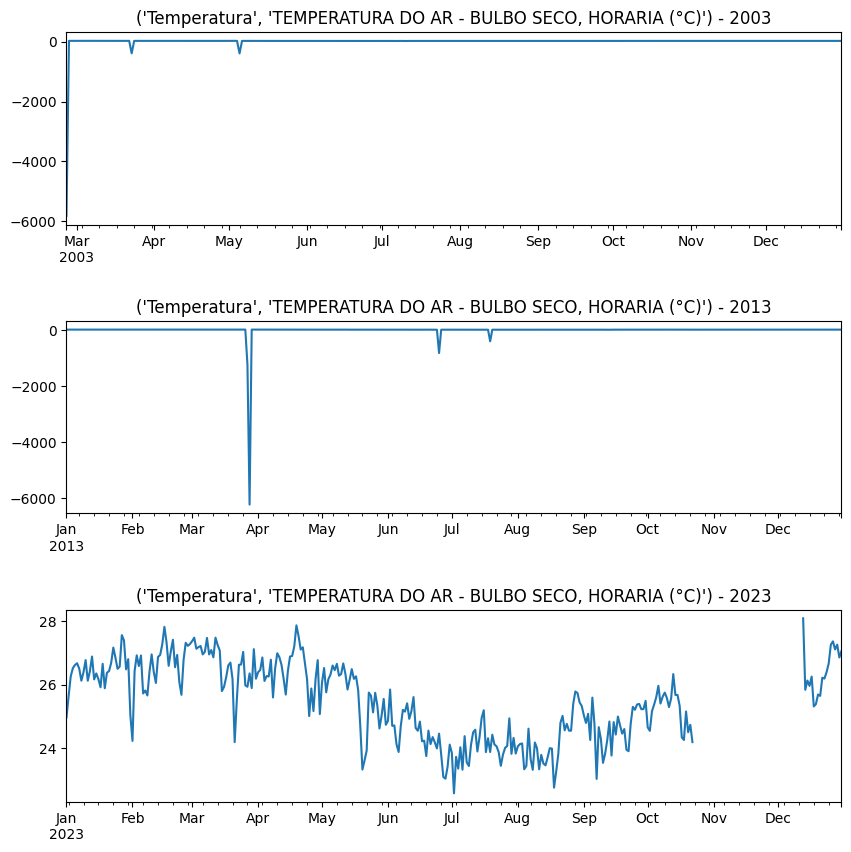

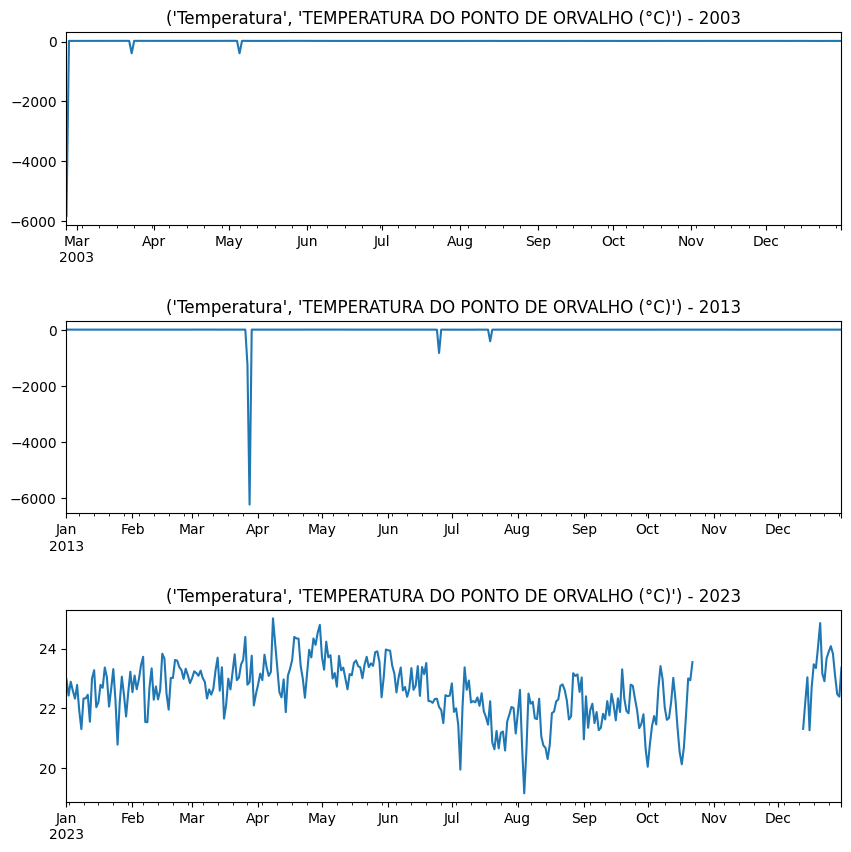

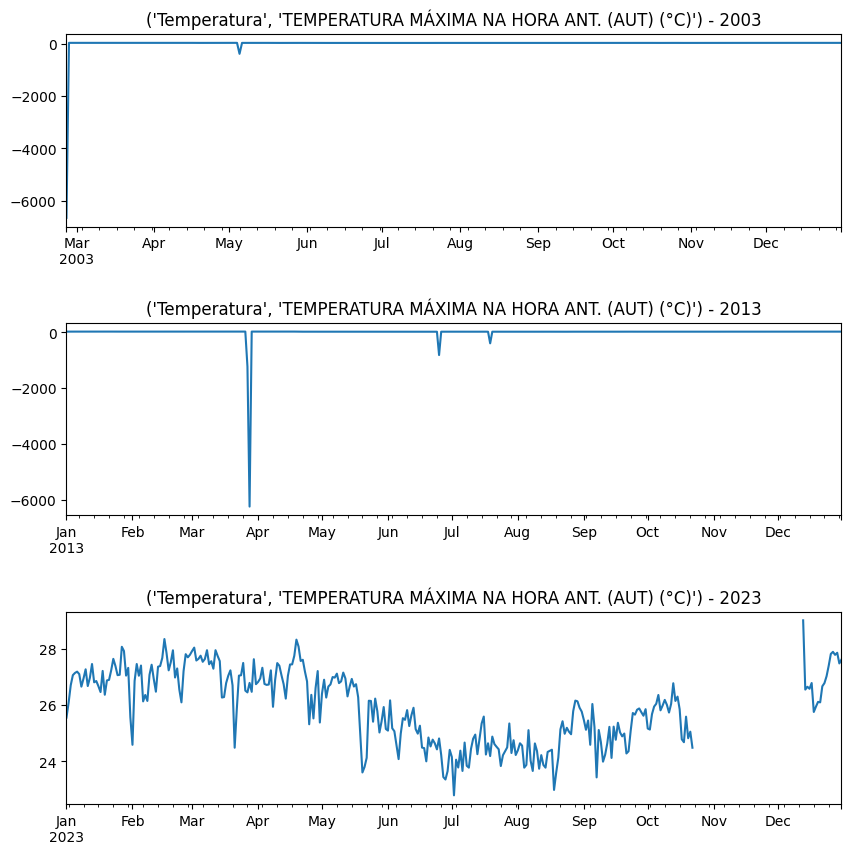

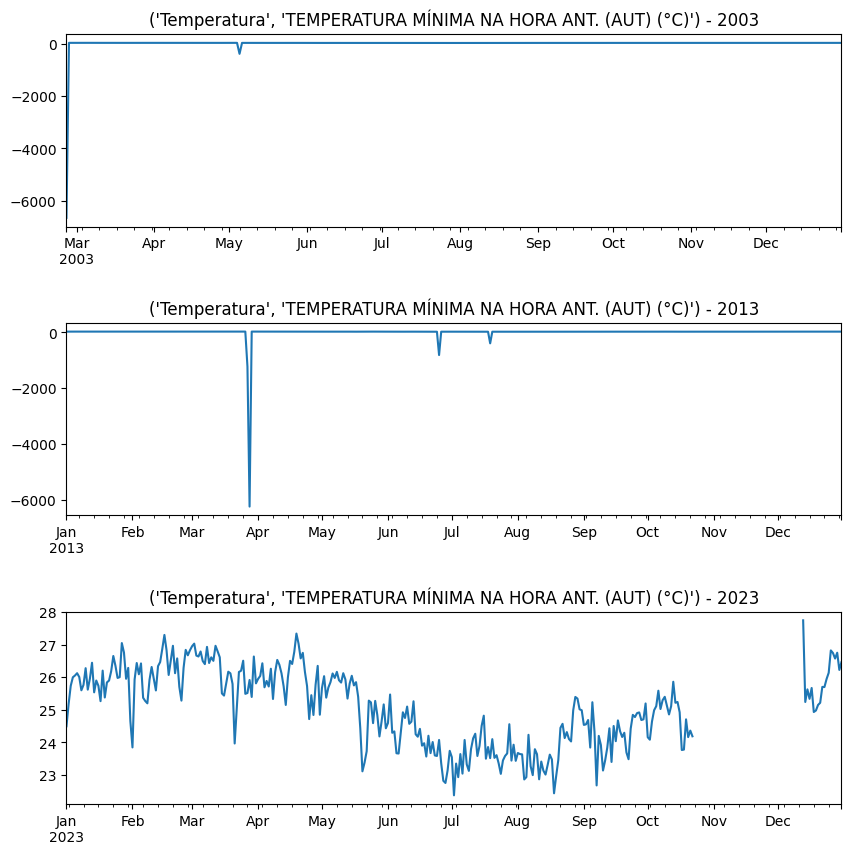

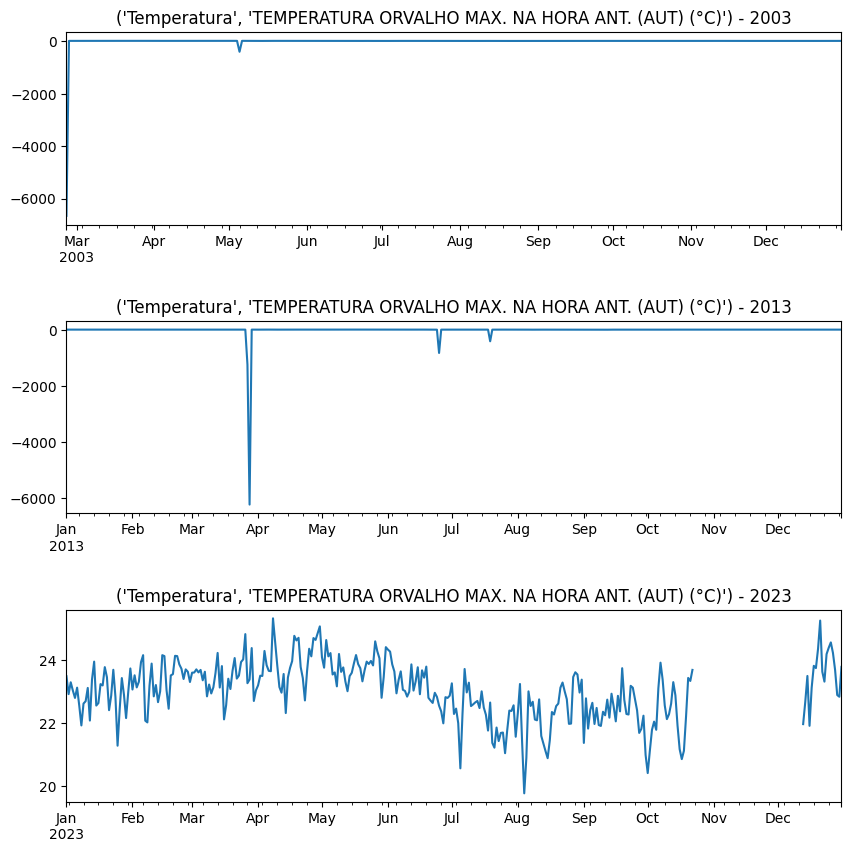

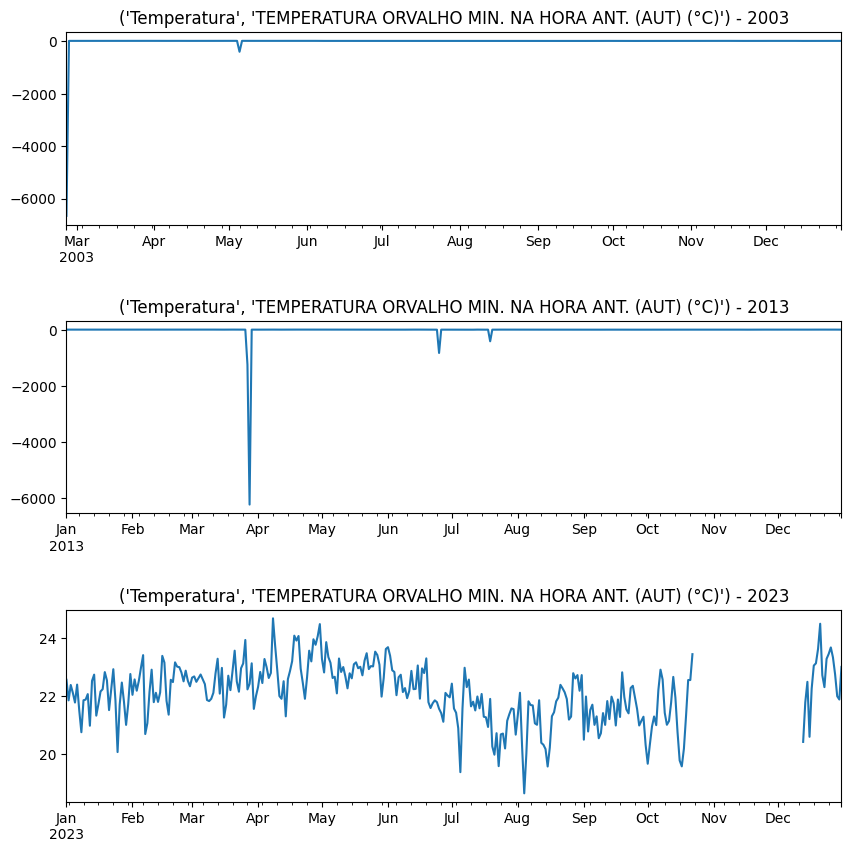

In [19]:
import matplotlib.pyplot as plt

anos = [2003, 2013, 2023]

for j in temperaturaMedia.columns.to_list():
    fig, ax = plt.subplots(nrows=len(anos), ncols=1, figsize=(10, 10))
    for i, ano in enumerate(anos):
        temperaturaMedia[temperaturaMedia.index.year == ano][j].plot(ax=ax[i])
        ax[i].set_title(f"{j} - {ano}")
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    plt.show()


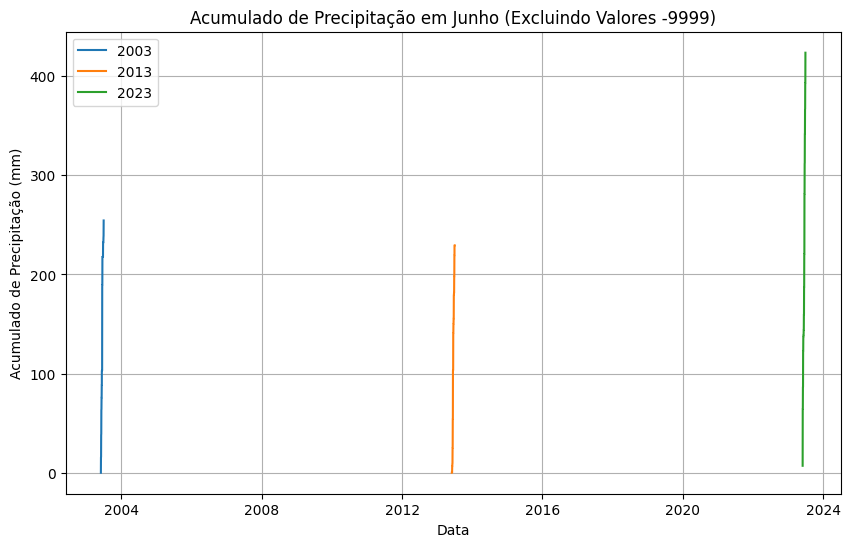

In [22]:
#tópico 2
import matplotlib.pyplot as plt

# Aqui fiz um filtro para o mês de junho e removi os valores que tem -9999
junho_data = df[(df.index.month == 6) & (df["PRECIPITAÇÃO TOTAL, HORÁRIO (mm)"] != -9999)]

# Plotei o gráfico
plt.figure(figsize=(10, 6))
for ano in anos:
    # Filtrando os dados para cada ano
    dados_ano = junho_data[junho_data.index.year == ano]
    
    # Calculando o acumulado
    acumulado_prec_junho = dados_ano["PRECIPITAÇÃO TOTAL, HORÁRIO (mm)"].cumsum()
    
    # Plotar os dados do acumulado 
    plt.plot(acumulado_prec_junho, label=str(ano))

plt.title('Acumulado de Precipitação em Junho (Excluindo Valores -9999)')
plt.xlabel('Data')
plt.ylabel('Acumulado de Precipitação (mm)')
plt.legend()
plt.grid(True)
plt.show()

